In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from yahoofinancials import YahooFinancials
%matplotlib inline

In [110]:
appl_df = yf.download('AAPL', 
                      start='2018-01-01', 
                      end='2019-12-31', 
                      progress=False)
appl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.380238,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.373032,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.565216,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.038452,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.882305,82271200


<AxesSubplot:title={'center':"Apple's stock price"}, xlabel='Date'>

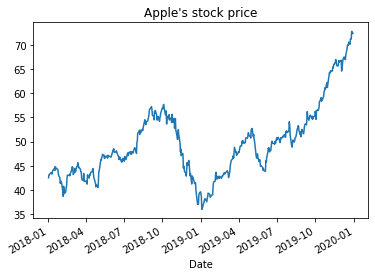

In [111]:
appl_df['Open'].plot(title="Apple's stock price")

In [112]:
sc = MinMaxScaler(feature_range = (0, 1))

In [113]:
def preproc( data, lag, ratio):
    data=data.dropna().iloc[:, 0:1]
    Dates=data.index.unique()
    data.iloc[:, 0] = sc.fit_transform(data.iloc[:, 0].values.reshape(-1, 1))
    for s in range(1, 15):
        data['shift_{}'.format(s)] = data.iloc[:, 0].shift(s)
    X_data = data.dropna().drop(['Open'], axis=1)
    y_data = data.dropna()[['Open']]
    index=int(round(len(X_data)*ratio))
    X_data_train=X_data.iloc[:index,:]
    X_data_test =X_data.iloc[index+1:,:]
    y_data_train=y_data.iloc[:index,:]
    y_data_test =y_data.iloc[index+1:,:]
    return X_data_train,X_data_test,y_data_train,y_data_test,Dates;

In [114]:
a,b,c,d,e=preproc(appl_df, 15, 0.75)

In [115]:
spy_df = yf.download('SPY', 
                      start='2018-01-01', 
                      end='2019-12-31', 
                      progress=False)
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,253.283142,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,254.885162,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,255.959488,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,257.665283,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,258.136414,57319200


In [116]:
def preproc2( data1, data2, lag, ratio):
    common_dates=list(set(data1.index) & set(data2.index))
    data1=data1[data1.index.isin(common_dates)]
    data2=data2[data2.index.isin(common_dates)]
    X1=preproc(data1, lag, ratio)
    X2=preproc(data2, lag, ratio)
    return X1,X2;

In [117]:
dataLSTM=preproc2( spy_df, appl_df, 15, 0.75)

In [132]:
dataLSTM[0][2]

,Open
Date,
2018-01-23,0.532870
2018-01-24,0.547454
2018-01-25,0.549049
2018-01-26,0.550074
2018-01-29,0.569215
...,...
2019-07-01,0.691694
2019-07-02,0.679503
2019-07-03,0.697391


In [133]:
dataLSTM[1][2]

,Open
Date,
2018-01-23,0.226451
2018-01-24,0.226111
2018-01-25,0.207489
2018-01-26,0.190431
2018-01-29,0.177926
...,...
2019-07-01,0.402270
2019-07-02,0.390309
2019-07-03,0.403018


In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping

In [121]:
a = a.values
b= b.values

c = c.values
d = d.values



In [122]:
X_train_t = a.reshape(a.shape[0], 1, 14)
X_test_t = b.reshape(b.shape[0], 1, 14)

In [106]:
K.clear_session()
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
model = Sequential()
model.add(LSTM(6, input_shape=(1, 14)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [107]:
model.fit(X_train_t, c,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
366/366 [==============================] - 1s 663us/step - loss: 0.0360
Epoch 2/100
366/366 [==============================] - 0s 639us/step - loss: 0.0021
Epoch 3/100
366/366 [==============================] - 0s 634us/step - loss: 0.0016
Epoch 4/100
366/366 [==============================] - 0s 643us/step - loss: 0.0013
Epoch 5/100
366/366 [==============================] - 0s 649us/step - loss: 0.0012
Epoch 6/100
366/366 [==============================] - 0s 638us/step - loss: 0.0012
Epoch 7/100
366/366 [==============================] - 0s 649us/step - loss: 8.7886e-04
Epoch 8/100
366/366 [==============================] - 0s 647us/step - loss: 9.1901e-04
Epoch 9/100
366/366 [==============================] - 0s 634us/step - loss: 8.7606e-04
Epoch 10/100
366/366 [==============================] - 0s 635us/step - loss: 8.3241e-04
Epoch 11/100
366/366 [==============================] - 0s 636us/step - loss: 7.7170e-04
Epoch 12/100
366/366 [==============================] 

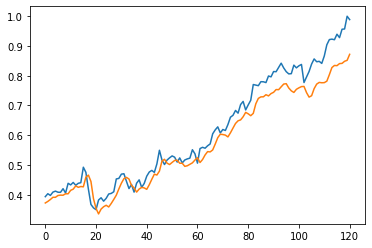

In [123]:
y_pred = model.predict(X_test_t)
plt.plot(d)
plt.plot(y_pred)

In [139]:
Aa = dataLSTM[0][0].values
Ab = dataLSTM[0][1].values

Ac = dataLSTM[0][2].values
Ad = dataLSTM[0][3].values
X_train_A = Aa.reshape(Aa.shape[0], 1, 14)
X_test_A = Ab.reshape(Ab.shape[0], 1, 14)

In [140]:
Sa = dataLSTM[1][0].values
Sb = dataLSTM[1][1].values

Sc = dataLSTM[1][2].values
Sd = dataLSTM[1][3].values
X_train_S = Sa.reshape(Sa.shape[0], 1, 14)
X_test_S = Sb.reshape(Sb.shape[0], 1, 14)

In [137]:
from keras.layers import concatenate
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM
from keras.models import Input, Model
from keras.layers import Dense



In [138]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
input1 = Input(shape=(1,14)) # for the three columns of dat_train
x1 = LSTM(6)(input1)

input2 = Input(shape=(1,14))
x2 = LSTM(6)(input2)

con = concatenate(inputs = [x1,x2] ) # merge in metadata
x3 = Dense(50)(con)
x3 = Dropout(0.3)(x3)
output = Dense(1, activation='sigmoid')(x3)
n_net = Model(inputs=[input1, input2], outputs=output)
n_net.compile(loss='mean_squared_error', optimizer='adam')

In [141]:
n_net.fit(x=[X_train_A, X_train_S], y=Ac, epochs=10, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/10
366/366 [==============================] - 2s 813us/step - loss: 0.0155
Epoch 2/10
366/366 [==============================] - 0s 755us/step - loss: 0.0072
Epoch 3/10
366/366 [==============================] - 0s 759us/step - loss: 0.0037
Epoch 4/10
366/366 [==============================] - 0s 758us/step - loss: 0.0030
Epoch 5/10
366/366 [==============================] - 0s 769us/step - loss: 0.0026
Epoch 6/10
366/366 [==============================] - 0s 769us/step - loss: 0.0031
Epoch 00006: early stopping


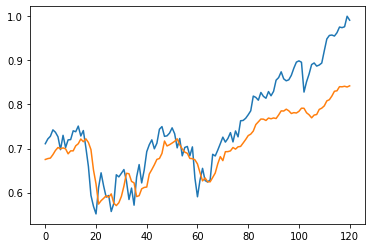

In [142]:
y_pred = n_net.predict([X_test_A,X_test_S])
plt.plot(Ad)
plt.plot(y_pred)